<div style="background-color: orange; color: black;">
  <h1> Stage 1 </h1>
</div>

<div style="background-color: lightblue; color: black;">
  <h3> Stage-1.1 </h3>
</div>

### Step 1 -- Creating tokens

In [ ]:
with open("the-verdict.txt" , "r", encoding = "utf-8") as f:
    raw_text = f.read()
print("total number of character: ", len(raw_text) )
print(raw_text[:1000])

total number of character:  20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its li

In [ ]:
import re

In [ ]:
preprocessing = re.split(r'([,.:;!?_"()\']|--|\s)', raw_text)

In [ ]:
preprocessed = [item.strip() for item in preprocessing if item.strip()]

In [ ]:
print(len(preprocessed))

4690


In [ ]:
print(preprocessing[0:30])

['I', ' ', 'HAD', ' ', 'always', ' ', 'thought', ' ', 'Jack', ' ', 'Gisburn', ' ', 'rather', ' ', 'a', ' ', 'cheap', ' ', 'genius', '--', 'though', ' ', 'a', ' ', 'good', ' ', 'fellow', ' ', 'enough', '--']


In [ ]:
all_token = sorted(set(preprocessed))

end of step 1

### Step 2 -- tokens to token id [ encoding - decoding ]

In [ ]:
# print(len(all_words))

In [ ]:
vocab = {token:integer for integer, token in enumerate(all_token)}

In [ ]:
for i, item in vocab.items():
    print(i)

!
"
'
(
)
,
--
.
:
;
?
A
Ah
Among
And
Are
Arrt
As
At
Be
Begin
Burlington
But
By
Carlo
Chicago
Claude
Come
Croft
Destroyed
Devonshire
Don
Dubarry
Emperors
Florence
For
Gallery
Gideon
Gisburn
Gisburns
Grafton
Greek
Grindle
Grindles
HAD
Had
Hang
Has
He
Her
Hermia
His
How
I
If
In
It
Jack
Jove
Just
Lord
Made
Miss
Money
Monte
Moon-dancers
Mr
Mrs
My
Never
No
Now
Nutley
Of
Oh
On
Once
Only
Or
Perhaps
Poor
Professional
Renaissance
Rickham
Riviera
Rome
Russian
Sevres
She
Stroud
Strouds
Suddenly
That
The
Then
There
They
This
Those
Though
Thwing
Thwings
To
Usually
Venetian
Victor
Was
We
Well
What
When
Why
Yes
You
_
a
abdication
able
about
above
abruptly
absolute
absorbed
absurdity
academic
accuse
accustomed
across
activity
add
added
admirers
adopted
adulation
advance
aesthetic
affect
afraid
after
afterward
again
ago
ah
air
alive
all
almost
alone
along
always
am
amazement
amid
among
amplest
amusing
an
and
another
answer
answered
any
anything
anywhere
apparent
apparently
appearance
appeared
appointed

In [ ]:
for i, item in enumerate(vocab.items()):
    print(item)

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)
('His', 51)
('How', 52)
('I', 53)
('If', 54)
('In', 55)
('It', 56)
('Jack', 57)
('Jove', 58)
('Just', 59)
('Lord', 60)
('Made', 61)
('Miss', 62)
('Money', 63)
('Monte', 64)
('Moon-dancers', 65)
('Mr', 66)
('Mrs', 67)
('My', 68)
('Never', 69)
('No', 70)
('Now', 71)
('Nutley', 72)
('Of', 73)
('Oh', 74)
('On', 75)
('Once', 76)
('Only', 77)
('

In [ ]:
class SimpleTokenizerV1:
    #constructor
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s  for s, i in vocab.items()}

        # self.int_to_str = {}
        # for s, i in vocab.items():
        #     self.int_to_str[i] = s


    # text to token id
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [ item.strip() for item in preprocessed if item.strip() ]
        ids = [
            self.str_to_int[s] for s in preprocessed
        ]
        return ids

    # token id to text
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids]) #replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text


In [ ]:
tokenizer = SimpleTokenizerV1(vocab)

text = """" It's the last he painted, you know,"
            Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [ ]:
#text = "Hello, do you like tea?"
#print(tokenizer.encode(text))

In [ ]:
all_token.extend(["<|endoftext|>", "<|unk|>"])

In [ ]:
vocab = {token:integer for integer, token in enumerate(all_token)}

In [ ]:
len(vocab.items())

1132

In [ ]:
print(vocab)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon-dancers': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Ri

In [ ]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [ ]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {}
        for s, i in vocab.items():
            self.int_to_str[i] = s

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        # comprehensive form
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        #long form
        #preprocessed = []
        #for item in preprocessed:
        #    if item.strip():
        #       preprocessed.append(item.strip())

        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
         # comprehensive form
        #preprocessed = [item if item in self.str_to_int else "<|unk|>" ]
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids]) #replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text



In [ ]:
tokenizer2 = SimpleTokenizerV2(vocab)
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = "<|endoftext|> ".join((text1, text2)) # "<|endoftext|> ekhane space na deyay jhamela hocchilo"
tokenizer2.encode(text)


[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [ ]:
text

'Hello, do you like tea?<|endoftext|> In the sunlit terraces of the palace.'

In [ ]:
tokenizer2.decode(tokenizer2.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

In [ ]:
! pip install tiktoken

In [ ]:
import importlib
import tiktoken ## this is a byte pair encoding tokenizer

In [ ]:
print("tiktoken version:",importlib.metadata.version("tiktoken"))

tiktoken version: 0.12.0


In [ ]:
tokenizerFromOpenAi = tiktoken.encoding_for_model("gpt2")

In [ ]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the someunknownPalace."
text = "<|endoftext|> ".join((text1, text2))
#print(tokenizerFromOpenAi.encode(text) this code does not work
ids = tokenizerFromOpenAi.encode(text, allowed_special={"<|endoftext|>"})
print(ids)

[15496, 11, 466, 345, 588, 8887, 30, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 262, 617, 34680, 11531, 558, 13]


In [ ]:
text = tokenizerFromOpenAi.decode(ids)
print(text)

Hello, do you like tea?<|endoftext|> In the sunlit terraces of the someunknownPalace.


### Step 3 -- token ids to vector representation

#### CREATING INPUT_TARGET PAIRS  (pre step of step 3)

In [ ]:
# uporer sob kichu(tokenization) just ei ek block a
with open("the-verdict.txt", "r",encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizerFromOpenAi.encode(raw_text) # create token and convert into id
print(len(enc_text))

5145


In [ ]:
enc_text

[40,
 367,
 2885,
 1464,
 1807,
 3619,
 402,
 271,
 10899,
 2138,
 257,
 7026,
 15632,
 438,
 2016,
 257,
 922,
 5891,
 1576,
 438,
 568,
 340,
 373,
 645,
 1049,
 5975,
 284,
 502,
 284,
 3285,
 326,
 11,
 287,
 262,
 6001,
 286,
 465,
 13476,
 11,
 339,
 550,
 5710,
 465,
 12036,
 11,
 6405,
 257,
 5527,
 27075,
 11,
 290,
 4920,
 2241,
 287,
 257,
 4489,
 64,
 319,
 262,
 34686,
 41976,
 13,
 357,
 10915,
 314,
 2138,
 1807,
 340,
 561,
 423,
 587,
 10598,
 393,
 28537,
 2014,
 198,
 198,
 1,
 464,
 6001,
 286,
 465,
 13476,
 1,
 438,
 5562,
 373,
 644,
 262,
 1466,
 1444,
 340,
 13,
 314,
 460,
 3285,
 9074,
 13,
 46606,
 536,
 5469,
 438,
 14363,
 938,
 4842,
 1650,
 353,
 438,
 2934,
 489,
 3255,
 465,
 48422,
 540,
 450,
 67,
 3299,
 13,
 366,
 5189,
 1781,
 340,
 338,
 1016,
 284,
 3758,
 262,
 1988,
 286,
 616,
 4286,
 705,
 1014,
 510,
 26,
 475,
 314,
 836,
 470,
 892,
 286,
 326,
 11,
 1770,
 13,
 8759,
 2763,
 438,
 1169,
 2994,
 284,
 943,
 17034,
 318,
 477,
 314,
 892,


In [ ]:
print(tokenizerFromOpenAi.decode(enc_text))

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?

Well!--even through th

In [ ]:
enc_sample = enc_text[50:]

In [ ]:
context_size = 4
# The context size is 4 means that the model is trained to look at a sequence of 4 words(or tokens)
# to predict the next 4 words in the sequence.
# The input x is the first 4 tokens[ 1, 2, 3, 4] and the terget y is the next 4 tokens[ 2, 3, 4, 5]

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context,"---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i] ## eta kono list naa. tai niche decode([desired]) likhte hoy. 3rd bracket use korte hoy

    print(tokenizerFromOpenAi.decode(context),"---->", tokenizerFromOpenAi.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


#### Dataset & DataLoader (pre step of step 3)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride): # txt = data, tokenizer = BPT, max_length = context length, stride= i kototuk samne agabe
        self.input_ids = []
        self.target_ids = []

        # Tokenizer the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i+1 : i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [ ]:
def create_dataloaderV1(txt, batch_size = 4, max_length=256,
                       stride=128,shuffle=True,drop_last=True,
                       num_workers=0):
    #Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    #create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    #Create dataloader
    dataloader =  DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle = shuffle,
        drop_last = drop_last,
        num_workers = num_workers
    )

    return dataloader

In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [ ]:
import torch
print("torch version: " ,torch.__version__)

torch version:  2.8.0+cu126


In [ ]:
dataloader = create_dataloaderV1(
    raw_text, batch_size = 2, max_length=4, stride = 1, shuffle=False
    # batch_size mane koyta batch per next iteration a print korbe. batch size 2 mane duita input row and duita output row
)
data_iter = iter(dataloader)
first_batch = next(data_iter)

print(first_batch)

# also i can do like this
print("\n")
input_tensor, target_tensor = next(data_iter)
print("input:\n", input_tensor)
print("target:\n",target_tensor)

[tensor([[  40,  367, 2885, 1464],
        [ 367, 2885, 1464, 1807]]), tensor([[ 367, 2885, 1464, 1807],
        [2885, 1464, 1807, 3619]])]


input:
 tensor([[2885, 1464, 1807, 3619],
        [1464, 1807, 3619,  402]])
target:
 tensor([[1464, 1807, 3619,  402],
        [1807, 3619,  402,  271]])


In [ ]:
print("input: \n", input_tensor)
print(" input tensor shape: \n", input_tensor.shape)
print("target: \n", target_tensor)

input: 
 tensor([[2885, 1464, 1807, 3619],
        [1464, 1807, 3619,  402]])
 input tensor shape: 
 torch.Size([2, 4])
target: 
 tensor([[1464, 1807, 3619,  402],
        [1807, 3619,  402,  271]])


# Embedding

### Token Embedding

In [ ]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
token_embedding = token_embedding_layer(input_tensor)

In [ ]:
print(token_embedding)

tensor([[[ 0.0698,  1.9603,  1.1439,  ..., -1.1592,  0.6218,  0.3397],
         [ 0.3521,  0.3167,  0.1604,  ..., -0.7171, -0.9665, -0.8060],
         [ 1.6146,  0.6523,  0.0891,  ...,  1.0039,  0.0389,  0.1876],
         [-0.4082,  1.9444,  1.3624,  ..., -0.7437, -0.2756,  0.2816]],

        [[ 0.3521,  0.3167,  0.1604,  ..., -0.7171, -0.9665, -0.8060],
         [ 1.6146,  0.6523,  0.0891,  ...,  1.0039,  0.0389,  0.1876],
         [-0.4082,  1.9444,  1.3624,  ..., -0.7437, -0.2756,  0.2816],
         [ 0.0906, -2.1625, -0.5455,  ..., -0.6741, -0.6047, -0.7653]]],
       grad_fn=<EmbeddingBackward0>)


In [ ]:
print(token_embedding.shape)

torch.Size([2, 4, 256])


### Positional Embedding

In [ ]:
max_length = 4
context_length = max_length
positional_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [ ]:
pos_embeddings = positional_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
input_embedding = token_embedding + pos_embeddings

In [ ]:
print(input_embedding.shape)

torch.Size([2, 4, 256])


# Implementing a Simplified Attention Mechanism

In [ ]:
import torch
input = torch.tensor(
    [[0.43, 0.15, 0.89],
     [0.55, 0.87, 0.66],
     [0.57, 0.85, 0.64],
     [0.22, 0.58, 0.33],
     [0.77, 0.25, 0.10],
     [0.05, 0.80, 0.55]]
)

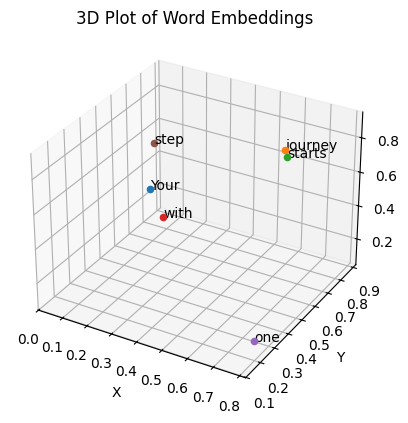

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

x_coords = input[:,0].numpy()   # input[row( : ), col(0)] => row sob, col just 0th
y_coords = input[:,1].numpy()   # input[row( : ), col(1)] => row sob, col just 1st
z_coords = input[:,2].numpy()   # input[row( : ), col(2)] => row sob, col just 2nd

# create 3D plot
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d') # Meaning::: “Inside my figure, create one single 3D plotting area and assign it to the variable ax so I can draw on it.”

for x, y, z , word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()